[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


            SP500_Close  VIX_Close
Date                              
2018-01-02  2695.810059       9.77
2018-01-03  2713.060059       9.15
2018-01-04  2723.989990       9.22
2018-01-05  2743.149902       9.22
2018-01-08  2747.709961       9.52
ADF Statistic: -11.853423740881892
p-value: 7.119616583190098e-22
Linear Regression MAE: 0.007217443442387082
Linear Regression RMSE: 0.009550987918424915
Random Forest MAE: 0.008338966932782748
Random Forest RMSE: 0.011062260424883966
Linear Regression MAE: 0.007217443442387082
Linear Regression RMSE: 0.009550987918424915
Random Forest MAE: 0.008338966932782748
Random Forest RMSE: 0.011062260424883966


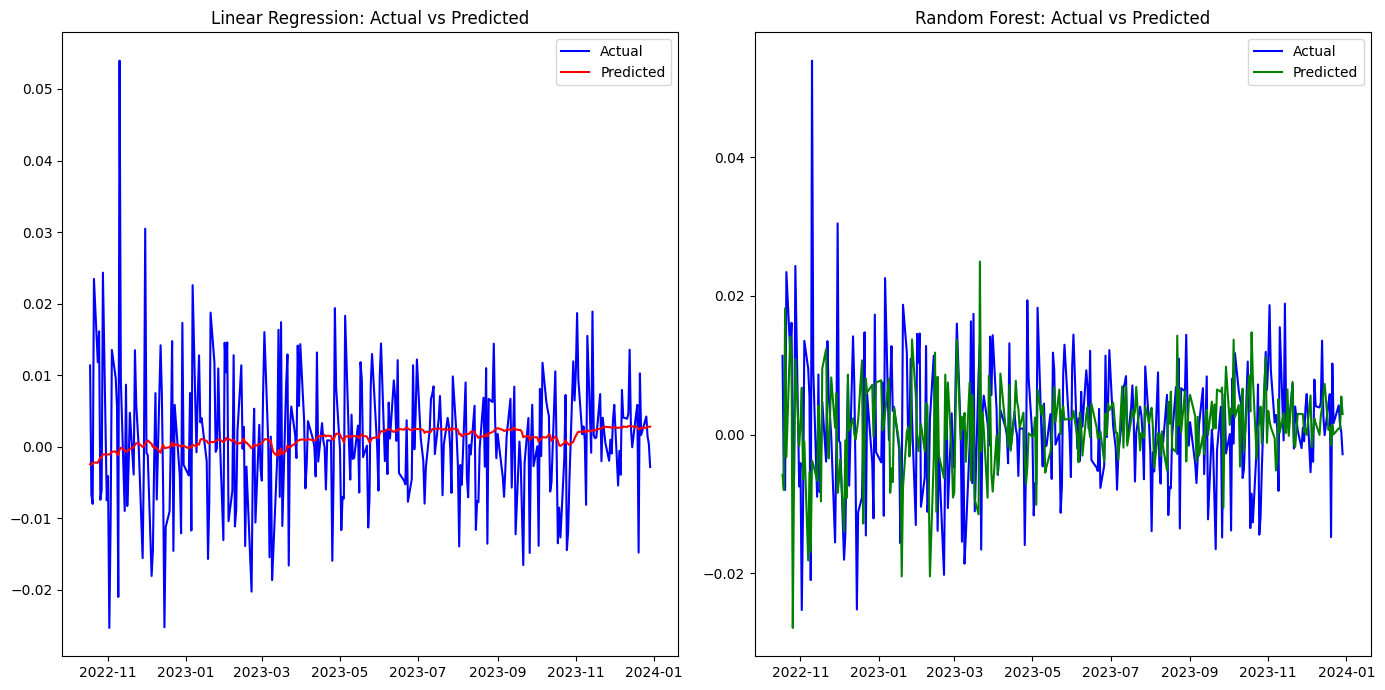

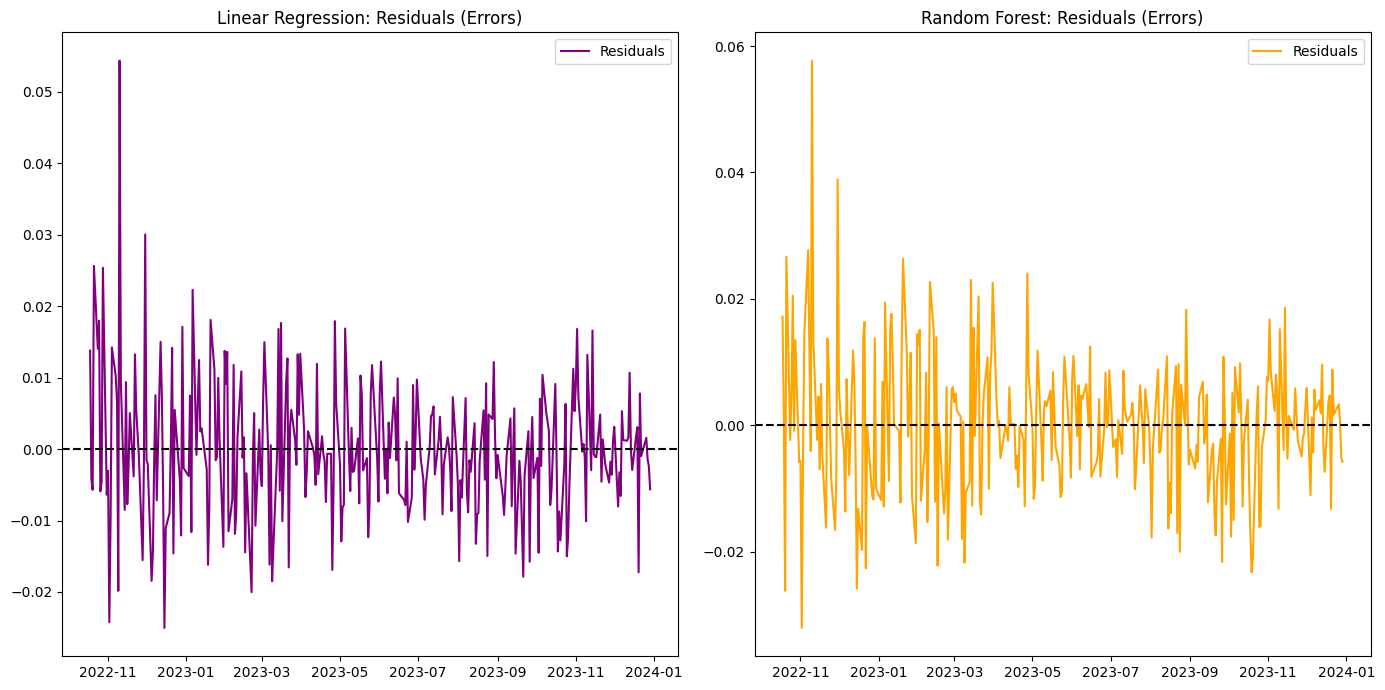

In [10]:
!pip install yfinance

# Import necessary libraries for data collection
import yfinance as yf
import pandas as pd

#ETAPE 1
# Define function to download S&P 500 data
def download_data(ticker, start_date, end_date):
    """
    Downloads historical stock data using yfinance for a given ticker.
    """
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Download data for the S&P 500 (ticker: "^GSPC") and VIX (ticker: "^VIX")
sp500_data = download_data("^GSPC", "2018-01-01", "2023-12-31")
vix_data = download_data("^VIX", "2018-01-01", "2023-12-31")

# Merge the two datasets on the date index
merged_data = pd.concat([sp500_data['Close'], vix_data['Close']], axis=1)
merged_data.columns = ['SP500_Close', 'VIX_Close']

# Save to CSV (optional)
merged_data.to_csv("sp500_vix_data.csv")

# Preview the dataset
print(merged_data.head())

#ETAPE2
# Importing necessary libraries
import numpy as np
import statsmodels.api as sm

# Step 1: Cleaning data
# Check for missing values and duplicates
merged_data.dropna(inplace=True)  # Drop rows with missing values
merged_data = merged_data[~merged_data.index.duplicated(keep='first')]  # Remove duplicates

# Step 2: Transform prices into log-returns
merged_data['SP500_Log_Return'] = np.log(merged_data['SP500_Close'] / merged_data['SP500_Close'].shift(1))

# Drop the first row as it will contain NaN due to shift
merged_data.dropna(inplace=True)

# Step 3: Perform ADF test for stationarity
adf_result = sm.tsa.adfuller(merged_data['SP500_Log_Return'])

# Print the ADF test result
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

#ETAPE3
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Split data into train and test sets (80% train, 20% test)
X = merged_data[['VIX_Close']]  # Exogenous variable for prediction
y = merged_data['SP500_Log_Return']  # Target variable (log-returns of S&P 500)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 2: Train and evaluate a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Calculate performance metrics for Linear Regression
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

# Step 3: Train and evaluate a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate performance metrics for Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Print results
print("Linear Regression MAE:", lr_mae)
print("Linear Regression RMSE:", lr_rmse)
print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)

#ETAPE4
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt

# Step 1: Compare performance metrics
print("Linear Regression MAE:", lr_mae)
print("Linear Regression RMSE:", lr_rmse)
print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)

# Step 2: Visualize Predictions vs Actual Values (Test Set)
plt.figure(figsize=(14,7))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, lr_predictions, label='Predicted', color='red')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

# Plot for Random Forest
plt.subplot(1, 2, 2)
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, rf_predictions, label='Predicted', color='green')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

# Step 3: Visualize Errors Over Time (Residuals)
lr_residuals = y_test - lr_predictions
rf_residuals = y_test - rf_predictions

plt.figure(figsize=(14,7))

# Residuals for Linear Regression
plt.subplot(1, 2, 1)
plt.plot(y_test.index, lr_residuals, label='Residuals', color='purple')
plt.title('Linear Regression: Residuals (Errors)')
plt.axhline(0, color='black', linestyle='--')
plt.legend()

# Residuals for Random Forest
plt.subplot(1, 2, 2)
plt.plot(y_test.index, rf_residuals, label='Residuals', color='orange')
plt.title('Random Forest: Residuals (Errors)')
plt.axhline(0, color='black', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

